# CLC - NOT NEEDED ANYMORE

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import geopandas as gpd
import pandas as pd
from pathlib import Path
import rasterio

import nasa_hls

import src
from src import configs
prjconf = configs.ProjectConfigParser()
tilenames = prjconf.get("Params", "tiles").split(" ")
tilenames

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['32UNU', '32UPU', '32UQU', '33UUP']

In [13]:
clc_paths = {tile: prjconf.get_path("Interim", "clc_subset5", tile=tile) for tile in tilenames}
clc_paths

{'32UNU': PosixPath('/home/ben/Devel/Projects/classify-hls/data/interim/clc/clc2018_32UNU_subset_500000.gpkg'),
 '32UPU': PosixPath('/home/ben/Devel/Projects/classify-hls/data/interim/clc/clc2018_32UPU_subset_500000.gpkg'),
 '32UQU': PosixPath('/home/ben/Devel/Projects/classify-hls/data/interim/clc/clc2018_32UQU_subset_500000.gpkg'),
 '33UUP': PosixPath('/home/ben/Devel/Projects/classify-hls/data/interim/clc/clc2018_33UUP_subset_500000.gpkg')}

In [15]:
gdf_unu = gpd.read_file(clc_paths["32UNU"])
gdf_upu = gpd.read_file(clc_paths["32UPU"])

In [21]:
gdf_unu

,cid_l3,pid,area,tile,cid_l1,cid_l2,geometry
0,313,1,50000.0,32UNU,3,31,"POLYGON ((498455.9551288121 5400025.59199067, ..."
1,311,2,140000.0,32UNU,3,31,"POLYGON ((504850.7419030861 5400112.340152972,..."
2,313,3,160000.0,32UNU,3,31,"POLYGON ((505550.1710185959 5400121.812985586,..."
3,231,4,30000.0,32UNU,2,23,"POLYGON ((506249.6000374462 5400131.282812582,..."
4,313,5,20000.0,32UNU,3,31,"POLYGON ((508247.9682237651 5400158.322901868,..."
5,112,6,50000.0,32UNU,1,11,"POLYGON ((509946.5808119804 5400181.287692721,..."
6,112,7,10000.0,32UNU,1,11,"POLYGON ((511845.0299681255 5400206.933257117,..."
7,222,8,100000.0,32UNU,2,22,"POLYGON ((511944.9483424818 5400208.282410699,..."
8,311,9,150000.0,32UNU,3,31,"POLYGON ((512844.2137147289 5400220.422034916,..."
9,112,10,10000.0,32UNU,1,11,"POLYGON ((518039.9703090243 5400290.464905435,..."


## DAG graph

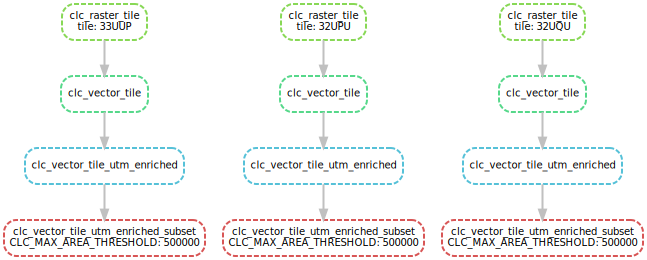

In [3]:
from IPython.display import SVG

SVG(filename="dag-graphs/dag_r2i_clc-to-tiled-vector-data.svg")

## Workflow

In [3]:
%%bash

cat ../../Snakefile_clc-to-tiled-vector-data

from src import configs
prjconf = configs.ProjectConfigParser()
TILES = prjconf.get("Params", "tiles").split(" ")

CLC_MAX_AREA_THRESHOLD = prjconf.get("Params", "clc_max_area_threshold")


rule all:
    input:
        expand("data/interim/clc/clc2018_{tile}_subset_{th}.gpkg", tile=TILES, th=CLC_MAX_AREA_THRESHOLD)


rule clc_raster_tile:
    input: 
        single_tile_footprint="data/raw/footprints/tiles/footprint_{tile}.gpkg",
        clc_raster="data/raw/clc/clc2018_clc2018_v2018_20b2_raster100m/clc2018_clc2018_V2018.20b2.tif"
    output: 
        temp("data/interim/clc/clc2018_{tile}_temp.tif")
    script:
        "scripts/clc-to-tiled-vector-data/clc_raster_tile.py"

rule clc_vector_tile:
    input: 
        "data/interim/clc/clc2018_{tile}_temp.tif"
    output: 
        temp("data/interim/clc/clc2018_{tile}_temp.gpkg")
    script:
        "scripts/clc-to-tiled-vector-data/clc_vector_tile.py"

rule clc_vector_tile_utm_enriched:
    input: 
        "data/raw/footprints/tiles/footp